### Hyper Parameter Tuning

One of the primary objective and challenge in machine learning process is improving the performance score, based on data patterns and observed evidence. To achieve this objective, almost all machine learning algorithms have specific set of parameters that needs to estimate from dataset which will maximize the performance score. The best way to choose good hyperparameters is through trial and error of all possible combination of parameter values. Scikit-learn provide GridSearch and RandomSearch functions to facilitate automatic and reproducible approach for hyperparameter tuning. 

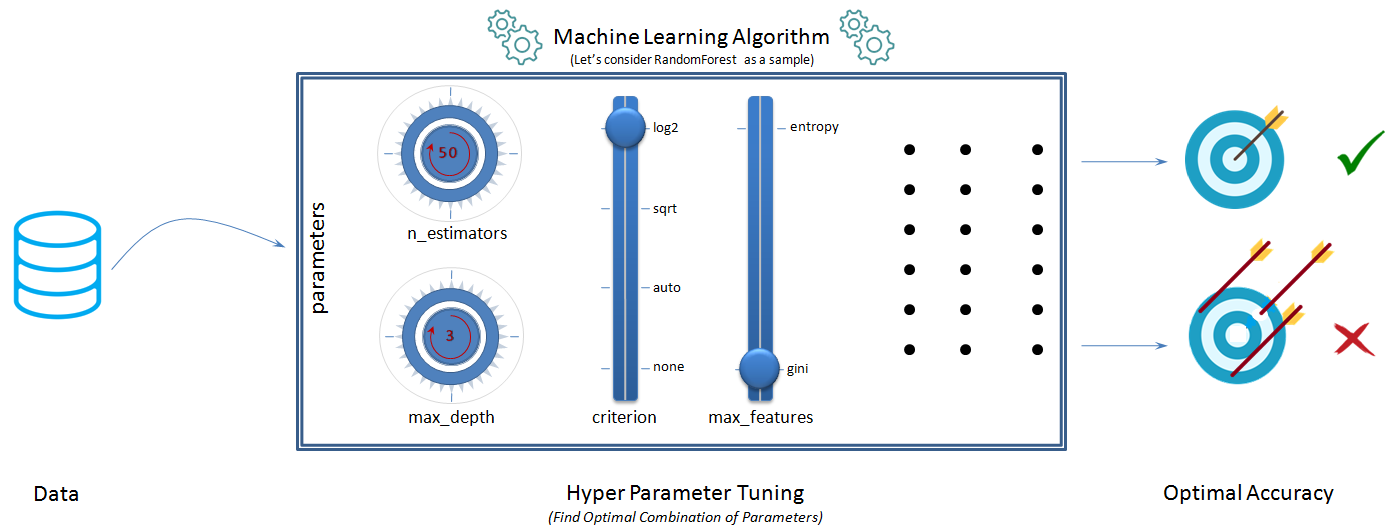

In [1]:
from IPython.display import Image
Image(filename='../Chapter 4 Figures/Hyper_Parameter_Tuning.png', width=1000)

### GridSearch

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
seed = 2017

# read the data in
df = pd.read_csv("Data/Diabetes.csv")

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values       # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=seed)
num_trees = 100

clf_rf = RandomForestClassifier(random_state=seed).fit(X_train, y_train)

rf_params = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'criterion':  ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 7, 9]
}

# setting verbose = 10 will print the progress for every 10 task completion
grid = GridSearchCV(clf_rf, rf_params, scoring='roc_auc', cv=kfold, verbose=10, n_jobs=-1)
grid.fit(X_train, y_train)
print ('Best Parameters: ', grid.best_params_)

base_model = model_selection.cross_val_score(clf_rf, X_train,y_train, cv=kfold)
gs_results = model_selection.cross_val_score(grid.best_estimator_, X_train,y_train, cv=kfold)
print ("Accuracy - Base Model Train CV: ", base_model.mean())
print ("Accuracy - Grid Search Train CV: ", gs_results.mean())
print ("Accuracy - Train : ", metrics.accuracy_score(grid.best_estimator_.predict(X_train), y_train))
print ("Accuracy - Test : ", metrics.accuracy_score(grid.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
Accuracy - Base Model Train CV:  0.70202492211838
Accuracy - Grid Search Train CV:  0.7447905849775008
Accuracy - Train :  0.8621973929236499
Accuracy - Test :  0.7965367965367965


### RandomSearch

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {'n_estimators':sp_randint(100,1000),
              'criterion': ['gini', 'entropy'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None, 1, 3, 5, 7, 9]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist, cv=kfold, 
                                   n_iter=n_iter_search, verbose=10, n_jobs=-1, random_state=seed)

random_search.fit(X_train, y_train)
# report(random_search.cv_results_)

print ('Best Parameters: ', random_search.best_params_)

results = model_selection.cross_val_score(random_search.best_estimator_, X_train,y_train, cv=kfold)
print ("Accuracy - Train CV: ", results.mean())
print ("Accuracy - Train : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_train), y_train))
print ("Accuracy - Test : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_test), y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.5s finished


Best Parameters:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'n_estimators': 694}
Accuracy - Train CV:  0.7542402215299411
Accuracy - Train :  0.7802607076350093
Accuracy - Test :  0.8051948051948052


### Bayesian Optimization

The objective of Bayesian Optimization is to find the maximum value in as few iterations as possible for an unknown function. The key difference is that space has probability distributions for each hyperparameter rather than discrete values. This technique is particularly suited for optimization of high cost functions, situations where the balance between exploration and exploitation is important

You can learn more about the package and example at https://github.com/fmfn/BayesianOptimization

In [25]:
# pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from bayes_opt.util import Colours
from sklearn.ensemble import RandomForestClassifier as RFC

def rfc_cv(n_estimators, min_samples_split, max_features, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = RFC(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_log_loss', cv=4)
    return cval.mean()

def optimize_rfc(data, targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfc_crossval(n_estimators, min_samples_split, max_features):
        """Wrapper of RandomForest cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return rfc_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.999), 1e-3),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "min_samples_split": (2, 25),
            "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    return optimizer
    

print(Colours.green("--- Optimizing Random Forest ---"))
optimizer = optimize_rfc(X_train, y_train)

--- Optimizing Random Forest ---
|   iter    |  target   | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        | -0.5112   |  0.2722   |  16.31    |  115.1    |
|  2        | -0.5248   |  0.806    |  19.94    |  75.42    |
|  3        | -0.5075   |  0.3485   |  20.44    |  240.0    |
|  4        | -0.528    |  0.8875   |  10.23    |  130.2    |
|  5        | -0.5098   |  0.7144   |  18.39    |  98.86    |
|  6        | -0.51     |  0.999    |  25.0     |  176.7    |
|  7        | -0.5113   |  0.7731   |  24.94    |  249.8    |
|  8        | -0.5339   |  0.999    |  2.0      |  250.0    |
|  9        | -0.5107   |  0.9023   |  24.96    |  116.2    |
|  10       | -0.8284   |  0.1065   |  2.695    |  10.04    |
|  11       | -0.5235   |  0.1204   |  24.89    |  208.1    |
|  12       | -0.5181   |  0.1906   |  2.004    |  81.15    |
|  13       | -0.5203   |  0.1441   |  2.057    |  185.3    |
|  14       | -0.5257   |  0.1265   |

In [24]:
print('RFC: %f' % optimizer.res['max']['max_val'])

TypeError: list indices must be integers or slices, not str